Black box accuracy: 0.8850
Surrogate fidelity: 0.9000


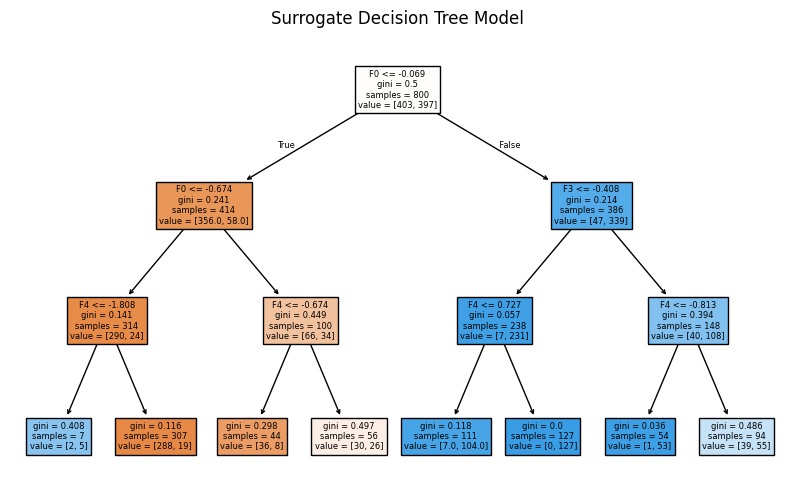

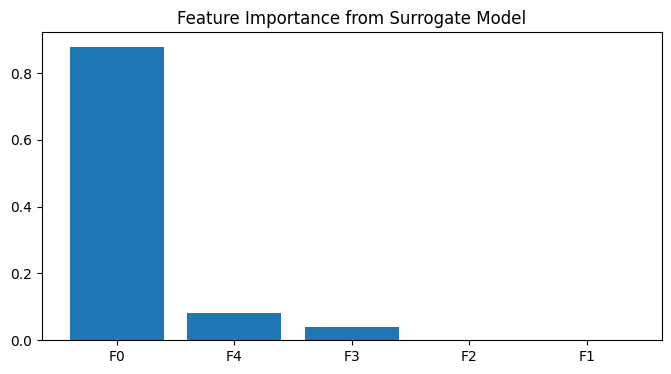

In [ ]:
# Import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a black box model (Random Forest)
black_box = RandomForestClassifier(random_state=42)
black_box.fit(X_train, y_train)

# Get black box predictions
y_pred_black_box = black_box.predict(X_test)
print(f"Black box accuracy: {accuracy_score(y_test, y_pred_black_box):.4f}")

# Train surrogate model on original features but black box predictions
surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_train, black_box.predict(X_train))

# Evaluate surrogate fidelity (how well it mimics the black box)
y_pred_surrogate = surrogate.predict(X_test)
print(f"Surrogate fidelity: {accuracy_score(y_pred_black_box, y_pred_surrogate):.4f}")

# Visualize the interpretable surrogate model
plt.figure(figsize=(10, 6))
plot_tree(surrogate, feature_names=[f"F{i}" for i in range(X.shape[1])], filled=True)
plt.title("Surrogate Decision Tree Model")
plt.show()

# Show feature importances from surrogate
importances = surrogate.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [f"F{i}" for i in indices])
plt.title("Feature Importance from Surrogate Model")
plt.show()
